In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib
import numpy as np
from tqdm import tqdm

In [ ]:
#Read data
food_parent_data = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/df_inverted_matrix_padded_2023-06-29.csv', header = 0)

<ipython-input-33-e16542c3ec65>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  food_parent_data = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/df_inverted_matrix_padded_2023-06-29.csv', header = 0)


In [ ]:
#Verificar se os códigos foram todas á origem ('root')
#aparentemente havia códigos mal atribuidos para além daqueles que foram removidos anteriormente
food_parent_data['0'].unique()

array(['root', nan, 'A02Q'], dtype=object)

In [ ]:
len(food_parent_data)

7321577

In [ ]:
#Read GDD data cleared of instances without english descriptions
food_data = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/ddd_2023-05-19_removed-entries.csv', header = 0,
                        usecols=['index', 'Base_Code', 'tc'])

<ipython-input-37-c4f2815b0521>:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  food_data = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/ddd_2023-05-19_removed-entries.csv', header = 0,


In [ ]:
len(food_data)

7321577

In [ ]:
#Perceber que rows não foram à origem
food_parent_data['0'].value_counts()

root    6421870
A02Q         11
Name: 0, dtype: int64

In [ ]:
food_parent_data['0'].isnull().sum()

899696

In [ ]:
#Perceber se rows que não foram à origem que que tem missing value (NaN), não tem código base
i = 0
for row in food_parent_data.loc[food_parent_data['0'].isnull() == True].index:
  if food_parent_data.iloc[row, :].isnull().all() == True:
    i = i + 1

In [ ]:
#Aparentemente nenhuma delas tem outros códigos (i = 899 696 que é igual ao número de de códigos de origem com NaN)
i

899696

In [ ]:
merged_food_parent_data = food_data.merge(food_parent_data, left_index = True, right_index = True)

In [ ]:
merged_food_parent_data

,index,Base_Code,tc,0,1,2,3,4,5,6,7
0,0,A03VD,mashed potatoes home made,root,A03VA,A03VB,A03VC,A03VD,NaN,NaN,NaN
1,1,A03VD,mashed potatoes home made,root,A03VA,A03VB,A03VC,A03VD,NaN,NaN,NaN
2,2,A03VD,mashed potatoes home made,root,A03VA,A03VB,A03VC,A03VD,NaN,NaN,NaN
3,3,A03VD,mashed potatoes home made,root,A03VA,A03VB,A03VC,A03VD,NaN,NaN,NaN
4,4,A00ZN,mashed swedes potatoes home made,root,A00FJ,A00ZA,A0F3F,A00ZN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7321572,7321943,A001D,NaN,root,A000J,A000K,A000L,A001C,A001D,NaN,NaN
7321573,7321944,A04JS,NaN,root,A01BS,A04RK,A01LA,A04JS,NaN,NaN,NaN
7321574,7321945,A00ZZ,NaN,root,A00ZR,A00ZS,A00ZY,A04JX,A00ZZ,NaN,NaN
7321575,7321946,A018E,NaN,root,A011X,A016S,A017X,A0CZA,A018E,NaN,NaN


In [ ]:
merged_food_parent_data = merged_food_parent_data.drop(food_parent_data.loc[food_parent_data['0'].isnull() == True].index.values, axis=0)

In [ ]:
merged_food_parent_data = merged_food_parent_data.drop(food_parent_data.loc[food_parent_data['0'] == 'A02Q'].index.values, axis=0)

In [ ]:
merged_food_parent_data['0'].unique()

array(['root'], dtype=object)

In [ ]:
merged_food_parent_data = merged_food_parent_data.drop('0', axis = 1)

In [ ]:
merged_food_parent_data = merged_food_parent_data.reset_index(drop=True)

In [ ]:
len(merged_food_parent_data)

6421870

In [ ]:
merged_food_parent_data['tc'].isnull().sum()

1868070

In [ ]:
merged_food_parent_data = merged_food_parent_data.drop(merged_food_parent_data.loc[merged_food_parent_data['tc'].isnull() == True].index.values, axis=0)

In [ ]:
merged_food_parent_data['tc'].isnull().sum()

0

In [ ]:
len(merged_food_parent_data)

4553800

In [ ]:
#Save compiled data
'''merged_food_parent_data.to_csv(path_or_buf = '/content/drive/My Drive/FoodEx2 project/Food Data/mfpd_2023-07-03_removed-entries.csv', index= False)

Confirmar o número de entradas sem descrições em inglês

In [ ]:
food_data = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/ddd_2023-05-19_removed-entries.csv', header = 0)

<ipython-input-3-56885b506d21>:1: DtypeWarning: Columns (3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  food_data = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/ddd_2023-05-19_removed-entries.csv', header = 0)


In [ ]:
food_data.columns

Index(['index', 'survey_name', 'rcp_ingr_label', 'original_id',
       'food_descr_ori', 'food_descr_eng', 'foodex2_code', 'foodex2_descr',
       'Base_Code', 'tc'],
      dtype='object')

In [ ]:
food_data['food_descr_eng'].isnull().sum()

2706550

In [ ]:
food_data['tc'].isnull().sum()

2706550

### Observar a distribuição de classes por hierarquia

In [3]:
#Read data
mfpd = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/mfpd_2023-07-03_removed-entries.csv', header = 0)

<ipython-input-3-507f96628351>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  mfpd = pd.read_csv('/content/drive/My Drive/FoodEx2 project/Food Data/mfpd_2023-07-03_removed-entries.csv', header = 0)


In [19]:
#Read MTX_14.2 (Sheet: 'term'; Columns:'termCode', 'status', 'detailLevel', 'reportParentCode')
MTX_14p2 = pd.read_excel('/content/drive/My Drive/FoodEx2 project/Food Data/MTX_14.2.xlsx', sheet_name='term') # usecols=['termCode', 'status', 'detailLevel'])

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Verificar se a concatenação dos códigos aos parentes foi correta ao verificar se os base codes dão match

In [ ]:
mfpd.columns

Index(['index', 'Base_Code', 'tc', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [ ]:
len(mfpd['Base_Code'].unique())

1729

In [ ]:
#tornar o dataframe num array the numpy (é mais rápido)
mfpd_arr = mfpd[['1', '2', '3', '4', '5', '6', '7']].values
#criar uma máscara que vai fazer só inverter os códigos e não os missing values (a máscara é criada com pandas porque a função do numpy não estava a dar)
mfpd_arr_mask = mfpd[['1', '2', '3', '4', '5', '6', '7']].notnull().values
#inverter e guardar num novo array
mfpd_arr_inverted = []
for row, mask in tqdm(zip(mfpd_arr, mfpd_arr_mask), total = len(mfpd_arr), desc="Processing rows"):
  mfpd_arr_inverted.append(np.array(row[mask][::-1]).tolist())

Processing rows: 100%|██████████| 4553800/4553800 [00:19<00:00, 232599.53it/s]


In [ ]:
len(mfpd)

4553800

In [ ]:
# Determine the maximum row length
max_length = max(len(row) for row in mfpd_arr_inverted)

# Pad the shorter rows with np.nan to ensure consistent length
mfpd_arr_inverted_padded = [row + [np.nan] * (max_length - len(row)) for row in mfpd_arr_inverted]

# Convert the matrix to a DataFrame
df_mfpd_arr_inverted_padded = pd.DataFrame(mfpd_arr_inverted_padded)

In [ ]:
#comparar os base codes obtidos do dataframe hierarquico com os originais para saber dão match ou foram trocados em algum passo
comparison = df_mfpd_arr_inverted_padded[0] == mfpd['Base_Code']

In [ ]:
comparison.sum()

4553800

In [ ]:
comparison.unique()

array([ True])

In [ ]:
#Verificar se exite alguma entrada sem código
df_mfpd_arr_inverted_padded[0].isnull().sum()

0

Os códigos base foram aparentam ter sido traduzidos corretamente, uma vez que não há diferenças entre os base codes originais e os obtidos no dataframe com a hierarquia

## **Produção de gráfico para observar a distribuição de classes**

Coluna 2

In [6]:
#Existem 8155 entradas que apresentam códigos hierárquicos "primários"
mfpd['2'].isnull().sum()

8155

In [ ]:
#Esses códigos fazem parte desta lista
mfpd.loc[mfpd['2'].isnull(), 'Base_Code'].unique()

array(['A032F', 'A039K', 'A01BS', 'A00FJ', 'A026T', 'A01QR', 'A02LR'],
      dtype=object)

In [ ]:
CodeList_info.loc[CodeList_info['1'].isin(mfpd.loc[mfpd['2'].isnull(), 'Base_Code'].unique().tolist()), 'Count'].sum()

1800433

In [7]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['2'].fillna(mfpd['1'], inplace=True)

In [8]:
mfpd['2'].isnull().sum()

0

Coluna 3

In [ ]:
#Existem 71615 entradas que apresentam códigos hierárquicos supeiroes aos desta coluna
mfpd['3'].isnull().sum()

71615

In [ ]:
#Esses códigos fazem parte desta lista
mfpd.loc[mfpd['3'].isnull(), 'Base_Code'].unique()

array(['A024F', 'A0EYH', 'A032F', 'A04PE', 'A04QN', 'A04ND', 'A039K',
       'A046F', 'A01BS', 'A00CV', 'A046M', 'A00TC', 'A00QF', 'A00SF',
       'A00ZA', 'A03MS', 'A026V', 'A02QE', 'A03DK', 'A01XD', 'A00FJ',
       'A0EYN', 'A026J', 'A0F1T', 'A0EVR', 'A0EVD', 'A0EYQ', 'A04RK',
       'A00HN', 'A04PY', 'A047A', 'A02MZ', 'A026T', 'A01QR', 'A02LR',
       'A00FL', 'A00KR', 'A0BX9', 'A0F3D', 'A00VA', 'A01YG', 'A00ZS',
       'A01ZK', 'A009T', 'A03PM', 'A03VB'], dtype=object)

In [9]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['3'].fillna(mfpd['2'], inplace=True)

In [10]:
mfpd['3'].isnull().sum()

0

In [ ]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['3'].fillna(mfpd['1'], inplace=True)

In [ ]:
mfpd['3'].isnull().sum()

0

Coluna 4

In [ ]:
#Existem 389674 entradas que apresentam códigos hierárquicos supeiroes aos desta coluna
mfpd['4'].isnull().sum()

389674

In [ ]:
#Esses códigos fazem parte desta lista
mfpd.loc[mfpd['4'].isnull(), 'Base_Code'].unique()

In [11]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['4'].fillna(mfpd['3'], inplace=True)

In [12]:
mfpd['4'].isnull().sum()

0

In [ ]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['4'].fillna(mfpd['2'], inplace=True)

In [ ]:
mfpd['4'].isnull().sum()

8155

In [ ]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['4'].fillna(mfpd['1'], inplace=True)

In [ ]:
mfpd['4'].isnull().sum()

0

Coluna 5

In [ ]:
#Existem 2405560 entradas que apresentam códigos hierárquicos supeiroes aos desta coluna
mfpd['5'].isnull().sum()

2405560

In [ ]:
#Esses códigos fazem parte desta lista
len(mfpd.loc[mfpd['5'].isnull(), 'Base_Code'].unique())

798

In [13]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['5'].fillna(mfpd['4'], inplace=True)
mfpd['5'].isnull().sum()

0

Coluna 6

In [15]:
#Existem 4105768 entradas que apresentam códigos hierárquicos supeiroes aos desta coluna
mfpd['6'].isnull().sum()

4105768

In [14]:
#Esses códigos fazem parte desta lista
len(mfpd.loc[mfpd['6'].isnull(), 'Base_Code'].unique())

1545

In [16]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['6'].fillna(mfpd['5'], inplace=True)
mfpd['6'].isnull().sum()

0

Coluna 7

In [ ]:
#Existem 4553751 entradas que apresentam códigos hierárquicos supeiroes aos desta coluna
mfpd['7'].isnull().sum()

4553751

In [ ]:
#Esses códigos fazem parte desta lista
len(mfpd.loc[mfpd['7'].isnull(), 'Base_Code'].unique())

1727

In [17]:
#Atribuir códigos parentais às entradas sem códigos
mfpd['7'].fillna(mfpd['6'], inplace=True)
mfpd['7'].isnull().sum()

0

Contrução do dataset das frequências e do Gráfico

In [4]:
def group_codes(column_name: str):
  CodeList = mfpd.groupby(column_name).agg(Count=(column_name, 'count'), UniqueDescriptions=('tc', 'nunique')).reset_index()
  CodeList_info = CodeList.merge(MTX_14p2, left_on = column_name, right_on = 'termCode')
  CodeList_info = CodeList_info.drop('termCode', axis=1)
  return CodeList_info

In [ ]:
CodeList_info = group_codes('7')

In [5]:
#Tornar as counts em frequências
def frequency_data(dataframe_name: object, data_column_string: str, order_data: bool, ascending_true_false: bool):

  if order_data == True:
    #Sort objects by counts
    dataframe_name = dataframe_name.sort_values(data_column_string, ascending = ascending_true_false).reset_index(drop = True)

  #Create column for relative frequency
  dataframe_name[data_column_string + '_fi'] = 100*(dataframe_name[data_column_string] / dataframe_name[data_column_string].sum())

  #Create column for cumulative relative frequency
  dataframe_name[data_column_string + '_Fi'] = 100*(dataframe_name[data_column_string].cumsum() / dataframe_name[data_column_string].sum())

  return dataframe_name

In [ ]:
#The basecode frequency should be ordered last
CodeList_info = frequency_data(CodeList_info, 'Count', True, True)
CodeList_info = frequency_data(CodeList_info, 'UniqueDescriptions', False, False)

In [ ]:
len(CodeList_info)

1729

In [ ]:
#Verificar se todas as entradas estão representadas
CodeList_info['Count'].sum() == len(mfpd)

True

In [ ]:
#Função para desenhar e guardar plots da distribuição das classes
def plot_class_distri(Dataframe_name: object, Column_count_name: str, Column_unique_name: str, Save_plot: bool):

  #Attribute Data Points
  x_data_points = Dataframe_name.index
  y_data_points_count = Dataframe_name[Column_count_name]
  y_data_points_unique = Dataframe_name[Column_unique_name]

  #Initiate Plot
  fig, ax1 = matplotlib.pyplot.subplots(1, sharex=True)

  #Plot Data In Axis And Assign X Values their Corresponding Y Values
  ax1.plot(x_data_points, y_data_points_count,
          '-', alpha = 0.5, markerfacecolor = 'firebrick', color='firebrick')
  ax1.plot(x_data_points, y_data_points_unique,
          '-', alpha = 0.5, markerfacecolor = 'teal', color='teal')

  #Copy Axis 1 To Create Differen Labels On Top Of The Plot
  ax3 = ax1.twiny()

  #Assign X axis ticks and attribute their labels
  ax1.set_xticks(np.arange(0, len(x_data_points),(len(x_data_points) - 1)/10).astype(int))
  ax3.set_xticks(np.arange(0, len(x_data_points),(len(x_data_points) - 1)/10).astype(int))
  ax1.set_xticklabels(np.arange(0, 1.1, 0.1).round(decimals = 1))

  #Assign Y axis ticks
  matplotlib.pyplot.yticks(np.arange(0, 101, 10))

  #Set axis limits
  ax1.set_xlim(0, len(x_data_points) - 1)
  ax3.set_xlim(0, len(x_data_points) - 1)
  matplotlib.pyplot.ylim([0, 100])

  #Set x axis grid
  ax1.grid(True)

  #Set labels and legends
  ax1.set_xlabel('Fraction of Data')
  ax3.set_xlabel('Index')
  ax1.set_ylabel('Frequency (%)')

  ax1.legend(('Total No.', 'No. Unique Strings'), loc = 'upper left')

  #Set Title
  #matplotlib.pyplot.title('text')

  if Save_plot == True:
    matplotlib.pyplot.savefig(fname = '/content/drive/My Drive/FoodEx2 project/Figures/' + 'CodeList_info' + CodeList_info.columns[0] + '.svg', format = 'svg', dpi = 1200, bbox_inches = 'tight')

  matplotlib.pyplot.show()

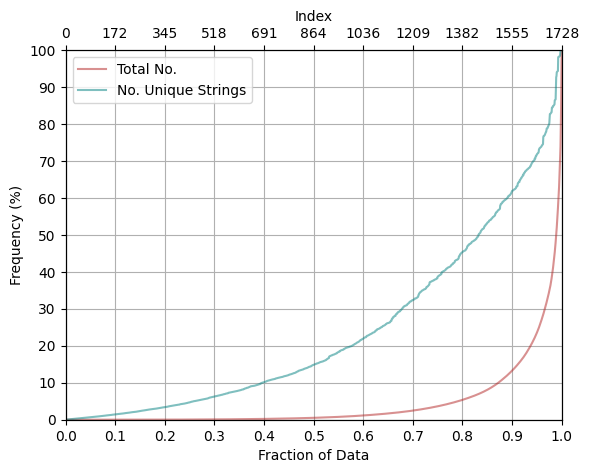

In [ ]:
plot_class_distri(CodeList_info , 'Count_Fi', 'UniqueDescriptions_Fi', True)

## Verificar quantos códigos do FoodEx2 estão compreendidos no dataset

In [ ]:
MTX_14p2.columns[50:70]

Index(['feedFlag', 'feedParentCode', 'feedOrder', 'feedReportable',
       'feedHierarchyCode', 'expoFlag', 'expoParentCode', 'expoOrder',
       'expoReportable', 'expoHierarchyCode', 'vetdrugFlag',
       'vetdrugParentCode', 'vetdrugOrder', 'vetdrugReportable',
       'vetdrugHierarchyCode', 'botanicFlag', 'botanicParentCode',
       'botanicOrder', 'botanicReportable', 'botanicHierarchyCode'],
      dtype='object')

In [ ]:
'termCode', 'status', 'detailLevel', 'LangualCode', 'expoFlag', 'expoParentCode', 'expoOrder', 'expoReportable', 'expoHierarchyCode'

In [ ]:
#Quantidade de códigos na hierarquia exposure
MTX_14p2.groupby('expoReportable').agg(Count=('expoReportable', 'count')).reset_index()

,expoReportable,Count
0,0.0,96
1,1.0,4471


In [ ]:
len(MTX_14p2['LangualCode'].unique()) - 1

2712

In [ ]:
#Verificar quandos códigos da hierarquia exposure tem atribuidos códigos langual
#(poderia procurar por dados classificados com este códigos e depois emparelha-los com os da foodex2 para aumentar os exemplos)
MTX_14p2.loc[MTX_14p2['expoReportable'].isin([0.0, 1.0]), 'LangualCode'].notnull().sum()

2

In [ ]:
MTX_14p2.loc[MTX_14p2['expoReportable'].isin([0.0, 1.0]), 'LangualCode'].isnull().sum()

4565

## Plot um gráfico com as percentagens de códigos com diferentes detalhes

In [ ]:
pie_plot_detail_data = MTX_14p2.loc[MTX_14p2['expoFlag'] == 1].groupby('detailLevel').agg(Count=('detailLevel', 'count')).reset_index()

In [ ]:
pie_plot_detail_data

,detailLevel,Count
0,C,1400
1,E,2682
2,H,137
3,M,174
4,P,174


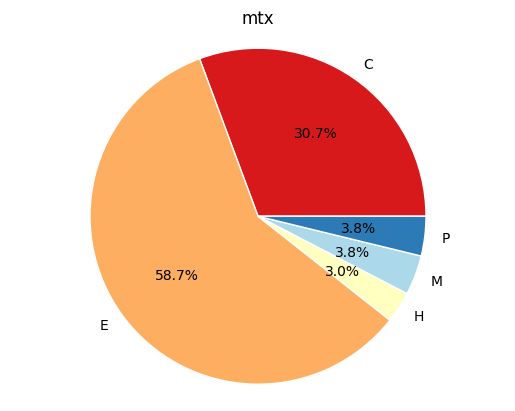

In [ ]:
plt = matplotlib.pyplot

# Create a pie chart
colors = ['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']

# Create a figure with transparent background
fig = plt.figure(facecolor='none')

plt.pie(pie_plot_detail_data['Count'], labels = pie_plot_detail_data['detailLevel'], colors = colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('mtx')
matplotlib.pyplot.savefig(fname = '/content/drive/My Drive/FoodEx2 project/Figures/' + 'mtx' + '_pie_' + '.svg', format = 'svg',
                          dpi = 1200, bbox_inches = 'tight')
# Display the chart
plt.show()

Obsevar a distribuição do detalhe dos códigos no dataset por coluna "hierarquica"

In [47]:
CodeList_info = group_codes('7')
#The basecode frequency should be ordered last
CodeList_info = frequency_data(CodeList_info, 'Count', True, True)
CodeList_info = frequency_data(CodeList_info, 'UniqueDescriptions', False, False)

In [48]:
#Mudar entre sum ou count dependendo do tipo de frequência que se quer alterar consequentemente no nome do gráfico
pie_plot_detail_data = CodeList_info.groupby('detailLevel').agg(Count=('Count', 'count')).reset_index()

In [49]:
pie_plot_detail_data

,detailLevel,Count
0,C,684
1,E,864
2,H,33
3,M,86
4,P,62


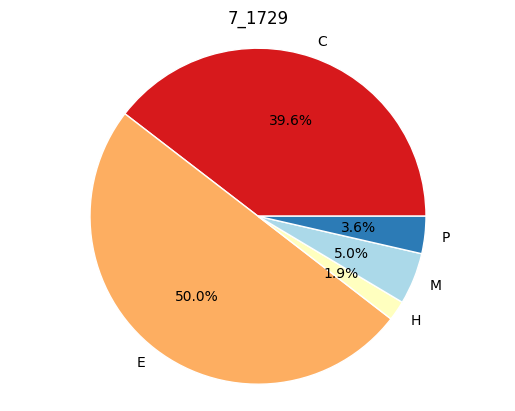

In [50]:
plt = matplotlib.pyplot

# Create a pie chart
colors = ['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']

# Create a figure with transparent background
fig = plt.figure(facecolor='none')

plt.pie(pie_plot_detail_data['Count'], labels = pie_plot_detail_data['detailLevel'], colors = colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title(CodeList_info.columns[0] + '_' + str(pie_plot_detail_data['Count'].sum()))
matplotlib.pyplot.savefig(fname = '/content/drive/My Drive/FoodEx2 project/Figures/' + 'CodeList_info' + '_pie_new' + CodeList_info.columns[0] + '.svg', format = 'svg',
                          dpi = 1200, bbox_inches = 'tight')
# Display the chart
plt.show()